In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.decomposition import PCA

In [2]:
import matplotlib.pyplot as plt
import matplotlib
zhfont1 = matplotlib.font_manager.FontProperties(fname='C:\Windows\Fonts\simkai.ttf')

## 读取数据

In [3]:
df = pd.read_excel('社融&国房指数.xls',index_col = 0)
df.index = pd.to_datetime(df.index)

In [4]:
df.head()

,社会融资规模:当月值,国房景气指数
2002-01-31,-472.0,103.91
2002-02-28,289.0,103.53
2002-03-31,3136.0,103.87
2002-04-30,1151.0,104.37
2002-05-31,1774.0,104.60


In [5]:
dollar = pd.read_excel('美元指数.xls',index_col = 0)
interest = pd.read_excel('1年期国债收益率.xls',index_col = 0)

In [6]:
dollar.tail()

,美元指数
2019-04-24,98.0905
2019-04-25,98.1789
2019-04-26,98.0330
2019-04-29,97.8394
2019-04-30,97.5235


In [7]:
interest.tail()

,中债国债到期收益率:1年
2019-04-25,2.6902
2019-04-26,2.6742
2019-04-28,2.6988
2019-04-29,2.7223
2019-04-30,2.6902


In [8]:
#日度时间序列
oldtimes = df.index[:-1]

In [9]:
# 月度时间序列
newtimes = []
for thetime in oldtimes:
    if thetime.month != 1:
        newtimes.append(thetime)

## 所有指标处理成月度数据

In [10]:
alldata = pd.DataFrame(index = newtimes, columns = ['社融规模mean','社融规模sum','社融规模last','国房景气指数','美元指数','国债收益率'])
for thetime in newtimes:
    alldata['国房景气指数'][thetime] = df['国房景气指数'][thetime]
    if thetime.month !=2:
        themonth = str(thetime)[:7]
        alldata['社融规模mean'][thetime] = df['社会融资规模:当月值'][thetime]        
        alldata['社融规模sum'][thetime] = df['社会融资规模:当月值'][thetime] 
        alldata['社融规模last'][thetime] = df['社会融资规模:当月值'][thetime]
        alldata['美元指数'][thetime] = dollar[themonth].mean().values[0]
        alldata['国债收益率'][thetime] = interest[themonth].mean().values[0]
    else:
        themonth = str(thetime)[:7]
        lastmonth = str(thetime.year) + '-01'
        alldata['社融规模mean'][thetime] = df['社会融资规模:当月值'][lastmonth:themonth].mean()
        alldata['社融规模sum'][thetime] = df['社会融资规模:当月值'][lastmonth:themonth].sum()
        alldata['社融规模last'][thetime] = df['社会融资规模:当月值'][lastmonth].values[0]
        alldata['美元指数'][thetime] = dollar[lastmonth:themonth].mean().values[0]
        alldata['国债收益率'][thetime] = interest[lastmonth:themonth].mean().values[0]

In [11]:
alldata.head()

,社融规模mean,社融规模sum,社融规模last,国房景气指数,美元指数,国债收益率
2002-02-28,-91.5,-183,-472,103.53,118.339,2.15214
2002-03-31,3136,3136,3136,103.87,117.955,1.9575
2002-04-30,1151,1151,1151,104.37,116.884,1.97943
2002-05-31,1774,1774,1774,104.6,113.383,1.88149
2002-06-30,2621,2621,2621,104.65,109.586,1.79802


In [12]:
alldata.isna().sum()

社融规模mean    0
社融规模sum     0
社融规模last    0
国房景气指数      0
美元指数        0
国债收益率       0
dtype: int64

## 1/2月社融数据按照 取平均、取和、取1月值 三种方式处理结果

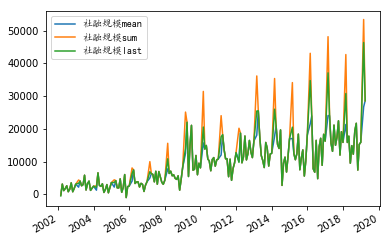

In [13]:
alldata[['社融规模mean','社融规模sum','社融规模last']].plot()
plt.legend(prop=zhfont1)

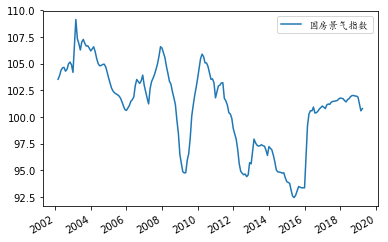

In [14]:
alldata[['国房景气指数']].plot()
plt.legend(prop=zhfont1)

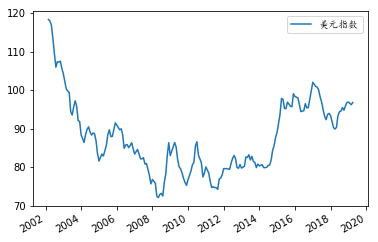

In [15]:
alldata[['美元指数']].plot()
plt.legend(prop=zhfont1)

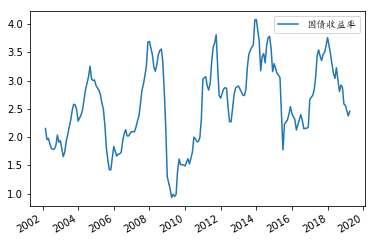

In [16]:
alldata[['国债收益率']].plot()
plt.legend(prop=zhfont1)

## MA与延期处理

In [17]:
alldata['国债收益率shift11'] = alldata['国债收益率'].shift(11)
alldata['社融sum_MA11'] = alldata['社融规模sum'].rolling(11).mean()
alldata['社融mean_MA11'] = alldata['社融规模mean'].rolling(11).mean()
alldata['社融last_MA11'] = alldata['社融规模last'].rolling(11).mean()

In [18]:
alldata = alldata.dropna()

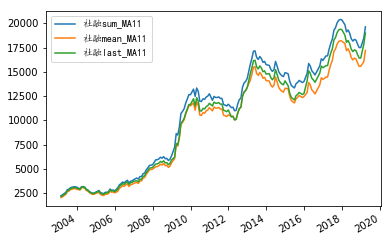

In [19]:
alldata[['社融sum_MA11','社融mean_MA11','社融last_MA11']].plot()
plt.legend(prop=zhfont1)

In [20]:
alldata['新增社融sum'] = alldata['社融sum_MA11']/alldata['社融sum_MA11'].shift(11) - 1
alldata['新增社融mean'] = alldata['社融mean_MA11']/alldata['社融mean_MA11'].shift(11) - 1
alldata['新增社融last'] = alldata['社融last_MA11']/alldata['社融last_MA11'].shift(11) - 1

## 新增社融

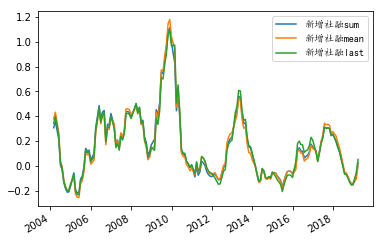

In [21]:
alldata[['新增社融sum','新增社融mean','新增社融last']].plot()
plt.legend(prop=zhfont1)

In [22]:
alldata = alldata.dropna()

In [23]:
alldata.head()

,社融规模mean,社融规模sum,社融规模last,国房景气指数,美元指数,国债收益率,国债收益率shift11,社融sum_MA11,社融mean_MA11,社融last_MA11,新增社融sum,新增社融mean,新增社融last
2004-02-29,1276,2552,2114,106.58,86.3898,2.39231,1.6556,2934.636364,2818.636364,2894.818182,0.307982,0.378735,0.344608
2004-03-31,6557,6557,6557,106.11,88.4578,2.48729,1.7344,3163.363636,3047.363636,3123.545455,0.360055,0.432950,0.397446
2004-04-30,2731,2731,2731,105.48,89.7995,2.66014,1.92496,3173.272727,3057.272727,3133.454545,0.290139,0.352558,0.322742
2004-05-31,2443,2443,2443,105,90.4729,2.84195,2.04215,3125.272727,3009.272727,3085.454545,0.216791,0.270174,0.245276
2004-06-30,3229,3229,3229,104.8,89.155,2.95709,2.17655,2887.727273,2771.727273,2847.909091,0.009246,0.041220,0.027924


In [24]:
newdata = alldata[['新增社融sum','国债收益率shift11','国房景气指数','美元指数']]
newdata.columns = ['新增社融','国债收益率shift','国房景气指数','美元指数']

In [25]:
newdata_standard = newdata/newdata.iloc[0]*100

## 处理完成后的指标

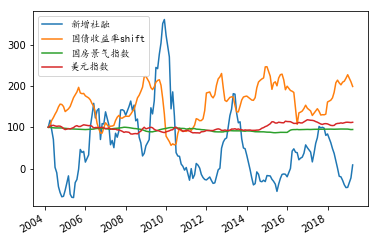

In [26]:
newdata_standard.plot()
plt.legend(prop=zhfont1)

In [27]:
newdata_change = newdata/newdata.shift(1) - 1##四项初始指标求同比

In [28]:
newdata_standard = (newdata-newdata.mean())/newdata.std()

## 定义求取主成分的函数

In [57]:
def get_Primary(newdata):
    thetimes = newdata_change['2010':].index
    Primary = pd.Series(index = thetimes)#存储主成分结果序列
    Primary.iloc[0] = 100
    weight = pd.DataFrame()#存储指标权重值
    weight2 = pd.DataFrame()#储存权重值翻转处理后结果
    #Primary2 = pd.Series(index = thetimes)
    #Primary2.iloc[0] = 100
    midvalue = 100
    midvalue2 = 100
    loading = pd.DataFrame()#储存因子载荷
    loading2 = pd.DataFrame()#因子载荷反转后结果
    for time in thetimes[1:]:
        strtime = str(time)
        btime = str(int(strtime[:4])-5)+strtime[4:7]#滚动窗起始时间
        btime = '2004-02'
        thedata = newdata[btime:time]
        thedata = newdata_standard[btime:time]
        thedata_standard = (thedata-thedata.mean())/thedata.std()#原始数据标准化
        thedata_standard = thedata
        X = np.array(thedata_standard)
        pca = PCA(n_components=1)#调包PCA
        newX = pca.fit_transform(X)
        PC = pd.DataFrame(newX)#窗口期内主成分序列结果
        
        spect = pca.components_#特征向量
        contr = pca.explained_variance_ratio_[0]#方差贡献
        theloading = spect*(contr**2)#因子载荷
        loading = pd.concat([loading,pd.DataFrame(theloading)])
        weight = pd.concat([weight,pd.DataFrame(spect)])
        
        PC = PC/theloading.sum()*100
        PC = (PC - PC.mean())/PC.std()#进一步标准化
        PC = PC-PC.iloc[0]+100
        
        change = PC.iloc[-1] - PC.iloc[-2]#获得窗口期主成分序列最后两项差值
        midvalue = change + midvalue
        Primary[time] = midvalue

        if theloading.sum()<0:#判断因子载荷是否翻转
            sign = -1
        else:
            sign = 1
        #midvalue2 = sign * change + midvalue2
        #Primary2[time] = midvalue2
        loading2 = pd.concat([loading2,pd.DataFrame(theloading*sign)])
        weight2 = pd.concat([weight2,pd.DataFrame(spect*sign)])
    loading2.index = thetimes[1:]
    loading2.columns = newdata.columns

    loading.index = thetimes[1:]
    loading.columns = newdata.columns

    weight.index = thetimes[1:]
    weight.columns = newdata.columns
    weight2.index = thetimes[1:]
    weight2.columns = newdata.columns
    return loading,loading2,weight,weight2,Primary

In [58]:
loading,loading2,weight,weight2,Primary = get_Primary(newdata)

## 严格按照上述步骤求出的主成分结果

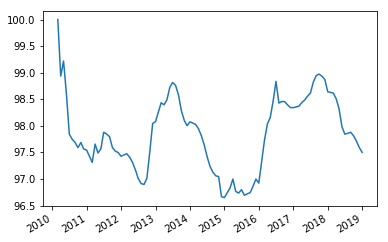

In [59]:
Primary['2010':'2018'].plot()

### 因子载荷结果

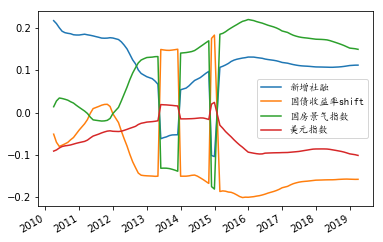

In [50]:
loading.plot()
plt.legend(prop=zhfont1)

### 权重结果

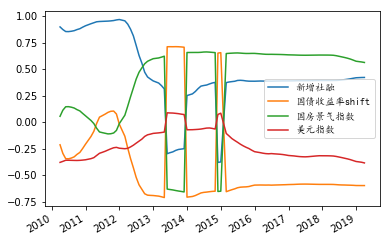

In [51]:
weight.plot()
plt.legend(prop=zhfont1)

### 因子载荷翻转处理后

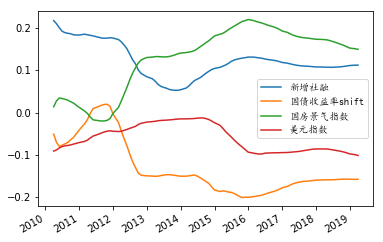

In [52]:
loading2.plot()
plt.legend(prop=zhfont1)

### 权重翻转处理后

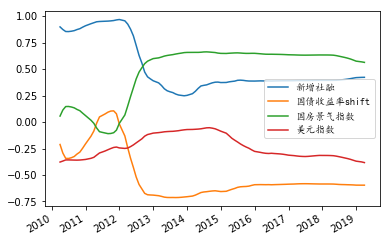

In [53]:
weight2.plot()
plt.legend(prop=zhfont1)

## 所有历史数据一步PCA

In [36]:
    thedata = newdata
    thedata_standard = (thedata-thedata.mean())/thedata.std()
    X = np.array(thedata_standard)
    pca = PCA(n_components=1)
    newX = pca.fit_transform(X)
    spect = pca.components_
    contr = pca.explained_variance_ratio_[0]
    allloading = spect*(contr**2)

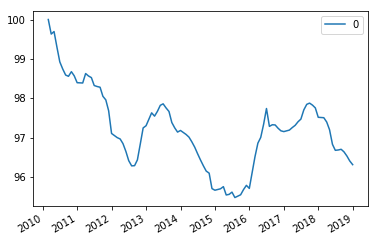

In [37]:
PC = pd.DataFrame(newX)
PC.index = newdata.index
PC = PC['2010':]
PC = PC/allloading.sum()*100
PC = (PC - PC.mean())/PC.std()
PC = PC-PC.iloc[0]+100
allPC = PC[0]
PC['2010':'2018'].plot()

In [38]:
spect## 权重

array([[ 0.42320015, -0.59642801,  0.56438617, -0.38294061]])

In [46]:
spect.sum()

0.008217686202291796

In [39]:
(spect**2).sum()

1.0

## 国债收益率数据读出与初步处理

In [40]:
bondreturn = pd.read_excel('10年国债收益率.xls',index_col = 0)

In [41]:
bondreturn.head()

,中债国债到期收益率:10年
指标名称,
2010-01-04,3.6603
2010-01-05,3.6606
2010-01-06,3.6425
2010-01-07,3.6543
2010-01-08,3.6614


In [42]:
bondindex = PC.index
bondreturnM = pd.DataFrame(index = bondindex, columns = ['净值','收益率'])
for thetime in bondindex:
    themonth = str(thetime)[:7]
    bondreturnM['净值'][thetime] = bondreturn['中债国债到期收益率:10年'][themonth].iloc[-1]
bondreturnM['收益率'] = bondreturnM['净值']/bondreturnM['净值'].shift(1) - 1
bondreturnM = bondreturnM.fillna(0)

## 定义构造多空策略的函数

In [43]:
def longshort(signal, monthreturn):
    long = (signal>=signal.shift(1))
    longshort = long*2-1
    strategy_month = longshort*monthreturn
    cumsum = strategy_month.cumsum()
    return (cumsum+1)*100

### 用严格按照步骤窗口处理获得的PCA序列做的多空策略结果

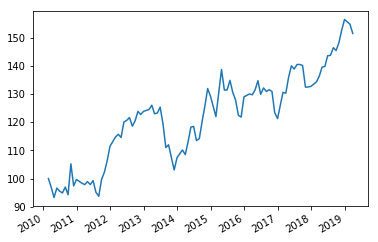

In [44]:
returns = longshort(Primary,bondreturnM['收益率'])
returns.plot()

### 用所有历史数据一步PCA序列做的多空策略结果

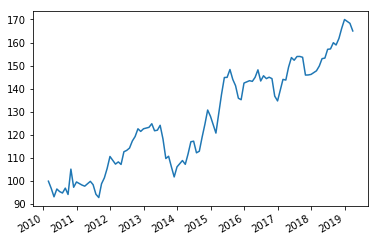

In [45]:
returns = longshort(allPC,bondreturnM['收益率'])
returns.plot()